In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/bulk_data.csv")
df

,Unnamed: 0,Unnamed: 0_x,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),...,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
0,0,0.0,2000-01-01,Apishapa,4.1,0.4,12.0,0.0,10000.0,24.0,...,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,2000-01-02,Apishapa,4.1,0.0,12.0,0.0,10000.0,18.0,...,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2000-01-03,Apishapa,4.1,0.0,12.0,0.0,10000.0,6.0,...,7.4,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,2000-01-04,Apishapa,4.1,0.0,15.0,3.0,10000.0,21.0,...,7.7,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,2000-01-05,Apishapa,4.5,0.4,14.0,-1.0,10000.0,24.0,...,7.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799144,799144,814836.0,2020-12-27,Zirkel,6.0,0.4,25.0,3.0,9340.0,19.0,...,9.0,0.2,0.2,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799145,799145,814837.0,2020-12-28,Zirkel,6.2,0.2,31.0,6.0,9340.0,17.0,...,9.2,0.5,0.5,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799146,799146,814838.0,2020-12-29,Zirkel,6.7,0.5,32.0,1.0,9340.0,16.0,...,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799147,799147,814839.0,2020-12-30,Zirkel,6.7,0.0,32.0,0.0,9340.0,15.0,...,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN


In [3]:
high_df=df[df['Elevation (ft)']>7500]
high_df

,Unnamed: 0,Unnamed: 0_x,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),...,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
0,0,0.0,2000-01-01,Apishapa,4.1,0.4,12.0,0.0,10000.0,24.0,...,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,2000-01-02,Apishapa,4.1,0.0,12.0,0.0,10000.0,18.0,...,7.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2000-01-03,Apishapa,4.1,0.0,12.0,0.0,10000.0,6.0,...,7.4,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,2000-01-04,Apishapa,4.1,0.0,15.0,3.0,10000.0,21.0,...,7.7,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,2000-01-05,Apishapa,4.5,0.4,14.0,-1.0,10000.0,24.0,...,7.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799144,799144,814836.0,2020-12-27,Zirkel,6.0,0.4,25.0,3.0,9340.0,19.0,...,9.0,0.2,0.2,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799145,799145,814837.0,2020-12-28,Zirkel,6.2,0.2,31.0,6.0,9340.0,17.0,...,9.2,0.5,0.5,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799146,799146,814838.0,2020-12-29,Zirkel,6.7,0.5,32.0,1.0,9340.0,16.0,...,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN
799147,799147,814839.0,2020-12-30,Zirkel,6.7,0.0,32.0,0.0,9340.0,15.0,...,9.7,0.0,0.0,NaN,NaN,33.0,NaN,34.0,35.0,NaN


In [4]:
high_df['Station Name'].unique()

array(['Apishapa', 'Bear Lake', 'Beartown', 'Berthoud Summit',
       'Bison Lake', 'Brumley', 'Buckskin Joe', 'Buffalo Park',
       'Burro Mountain', 'Butte', 'Cascade', 'Cascade #2', 'Columbine',
       'Columbine Pass', 'Columbus Basin', 'Copeland Lake',
       'Copper Mountain', 'Crosho', 'Culebra #2', 'Cumbres Trestle',
       'Deadman Hill', 'Dry Lake', 'Echo Lake', 'El Diente Peak',
       'Elk River', 'Fremont Pass', 'Grizzly Peak', 'Hoosier Pass',
       'Idarado', 'Independence Pass', 'Ivanhoe', 'Jackwhacker Gulch',
       'Joe Wright', 'Jones Pass', 'Kiln', 'Lake Eldora', 'Lake Irene',
       'Lily Pond', 'Lizard Head Pass', 'Lone Cone', 'Lost Dog',
       'Loveland Basin', 'Lynx Pass', 'Mancos', 'Mc Clure Pass',
       'Medano Pass', 'Mesa Lakes', 'Michigan Creek', 'Middle Creek',
       'Mineral Creek', 'Molas Lake', 'Nast Lake', 'Niwot',
       'North Lost Trail', 'Overland Res.', 'Park Cone', 'Park Reservoir',
       'Phantom Valley', 'Porphyry Creek', 'Rabbit Ears',
  

In [11]:
# 'Berthoud Summit','Rabbit Ears','Wolf Creek Summit','Red Mountain Pass',
high_df=high_df.loc[(high_df['Station Name']== 'Berthoud Summit') 
                                        |(high_df['Station Name']== 'Rabbit Ears') 
                                        |(high_df['Station Name']== 'Wolf Creek Summit') 
                                        |(high_df['Station Name']== 'Red Mountain Pass')]
high_df

,Unnamed: 0,Unnamed: 0_x,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),...,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
1098,1098,5300.0,2000-01-01,Berthoud Summit,4.4,0.0,NaN,NaN,11300.0,19.0,...,6.1,0.0,0.0,NaN,5.20,NaN,NaN,NaN,NaN,NaN
1099,1099,5301.0,2000-01-02,Berthoud Summit,4.4,0.0,NaN,NaN,11300.0,11.0,...,6.1,0.3,0.3,NaN,1.78,NaN,NaN,NaN,NaN,NaN
1100,1100,5302.0,2000-01-03,Berthoud Summit,4.6,0.2,NaN,NaN,11300.0,-1.0,...,6.4,0.0,0.0,NaN,1.62,NaN,NaN,NaN,NaN,NaN
1101,1101,5303.0,2000-01-04,Berthoud Summit,4.6,0.0,NaN,NaN,11300.0,10.0,...,6.4,0.5,0.5,NaN,1.28,NaN,NaN,NaN,NaN,NaN
1102,1102,5304.0,2000-01-05,Berthoud Summit,4.8,0.2,NaN,NaN,11300.0,9.0,...,6.9,0.0,0.3,NaN,0.94,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798778,798778,814332.0,2020-12-27,Wolf Creek Summit,13.1,0.0,47.0,0.0,11000.0,19.0,...,13.1,0.2,0.3,NaN,NaN,33.0,NaN,276.0,35.0,NaN
798779,798779,814333.0,2020-12-28,Wolf Creek Summit,13.4,0.3,49.0,2.0,11000.0,24.0,...,13.3,1.7,2.1,NaN,NaN,33.0,NaN,276.0,35.0,NaN
798780,798780,814334.0,2020-12-29,Wolf Creek Summit,15.5,2.1,65.0,16.0,11000.0,15.0,...,15.0,0.2,0.2,NaN,NaN,33.0,NaN,280.0,35.0,NaN
798781,798781,814335.0,2020-12-30,Wolf Creek Summit,15.7,0.2,66.0,1.0,11000.0,15.0,...,15.2,0.0,0.0,NaN,NaN,33.0,NaN,276.0,35.0,NaN


In [15]:
df=high_df.fillna(0)

In [4]:
df=df[df['Station Name']== "Buffalo Park"]
df

,Unnamed: 0,Unnamed: 0_x,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),...,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
2562,2562,11144.0,2000-01-01,Buffalo Park,4.3,0.0,NaN,NaN,9240.0,17.0,...,5.2,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,2563,11145.0,2000-01-02,Buffalo Park,4.5,0.2,NaN,NaN,9240.0,12.0,...,5.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,2564,11146.0,2000-01-03,Buffalo Park,4.5,0.0,NaN,NaN,9240.0,3.0,...,5.5,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,2565,11147.0,2000-01-04,Buffalo Park,4.5,0.0,NaN,NaN,9240.0,13.0,...,5.6,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,2566,11148.0,2000-01-05,Buffalo Park,4.7,0.2,NaN,NaN,9240.0,12.0,...,5.8,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761812,761812,763457.0,2020-12-27,Buffalo Park,3.7,0.2,19.0,2.0,9240.0,16.0,...,3.7,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761813,761813,763458.0,2020-12-28,Buffalo Park,3.8,0.1,20.0,1.0,9240.0,15.0,...,3.8,0.4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761814,761814,763459.0,2020-12-29,Buffalo Park,4.2,0.4,22.0,2.0,9240.0,12.0,...,4.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761815,761815,763460.0,2020-12-30,Buffalo Park,4.2,0.0,22.0,0.0,9240.0,2.0,...,4.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
list(df.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'Date',
 'Station Name',
 'Snow Water Equivalent (in) Start of Day Values',
 'Change In Snow Water Equivalent (in)',
 'Snow Depth (in) Start of Day Values',
 'Change In Snow Depth (in)',
 'Elevation (ft)',
 'Air Temperature Average (degF)',
 'Latitude',
 'Longitude',
 'County Name',
 'Unnamed: 0_y',
 'Station Id',
 'Air Temperature Observed (degF) Start of Day Values',
 'Barometric Pressure (inch_Hg) Start of Day Values',
 'Precipitation Accumulation (in) Start of Day Values',
 'Precipitation Increment (in)',
 'Precipitation Increment - Snow-adj (in)',
 'Precipitation Month-to-date (in)',
 'Solar Radiation Average (watt/m2)',
 'Soil Temperature Observed -2in (degF) Start of Day Values',
 'Soil Temperature Observed -4in (degF) Start of Day Values',
 'Soil Temperature Observed -8in (degF) Start of Day Values',
 'Soil Temperature Observed -20in (degF) Start of Day Values',
 'Soil Temperature Observed -40in (degF) Start of Day Values']

In [21]:
high_df=high_df.fillna(0)

In [6]:
dates=df['Date'].astype('datetime64[ns]')
dates=dates.dt.dayofyear
df['Date']=dates
one_hot = pd.get_dummies(df['Station Name'])
# Drop column as it is now encoded
df1 = df.drop(['Station Name'],axis = 1)
# Join the encoded df
testing_df = df1.join(one_hot)
# testing_df 
station_list=list(df['Station Name'].unique())
county_list=[]
features_list=['Date','Snow Depth (in) Start of Day Values',
               'Air Temperature Observed (degF) Start of Day Values',
               'Elevation (ft)','Solar Radiation Average (watt/m2)']
# features_list
df

C:\Users\tiij8\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Unnamed: 0_x,Date,Station Name,Snow Water Equivalent (in) Start of Day Values,Change In Snow Water Equivalent (in),Snow Depth (in) Start of Day Values,Change In Snow Depth (in),Elevation (ft),Air Temperature Average (degF),...,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Increment - Snow-adj (in),Precipitation Month-to-date (in),Solar Radiation Average (watt/m2),Soil Temperature Observed -2in (degF) Start of Day Values,Soil Temperature Observed -4in (degF) Start of Day Values,Soil Temperature Observed -8in (degF) Start of Day Values,Soil Temperature Observed -20in (degF) Start of Day Values,Soil Temperature Observed -40in (degF) Start of Day Values
2562,2562,11144.0,1,Buffalo Park,4.3,0.0,NaN,NaN,9240.0,17.0,...,5.2,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,2563,11145.0,1,Buffalo Park,4.5,0.2,NaN,NaN,9240.0,12.0,...,5.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,2564,11146.0,1,Buffalo Park,4.5,0.0,NaN,NaN,9240.0,3.0,...,5.5,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,2565,11147.0,1,Buffalo Park,4.5,0.0,NaN,NaN,9240.0,13.0,...,5.6,0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,2566,11148.0,1,Buffalo Park,4.7,0.2,NaN,NaN,9240.0,12.0,...,5.8,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761812,761812,763457.0,1,Buffalo Park,3.7,0.2,19.0,2.0,9240.0,16.0,...,3.7,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761813,761813,763458.0,1,Buffalo Park,3.8,0.1,20.0,1.0,9240.0,15.0,...,3.8,0.4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761814,761814,763459.0,1,Buffalo Park,4.2,0.4,22.0,2.0,9240.0,12.0,...,4.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761815,761815,763460.0,1,Buffalo Park,4.2,0.0,22.0,0.0,9240.0,2.0,...,4.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
y = testing_df['Change In Snow Depth (in)']#.values.reshape(-1, 1)
X=testing_df[features_list].astype('int').values.reshape(-1, len(features_list))
# X.head()

print("Shape: ", X.shape, y.shape)
X

Shape:  (30684, 5) (30684,)


array([[    1,     0,    18, 11300,     5],
       [    1,     0,    13, 11300,     1],
       [    1,     0,     1, 11300,     1],
       ...,
       [    1,    65,    21, 11000,     0],
       [    1,    66,     7, 11000,     0],
       [    1,    63,    22, 11000,     0]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [35]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

k: 1, Train/Test Score: 0.826/0.510
k: 3, Train/Test Score: 0.694/0.527
k: 5, Train/Test Score: 0.665/0.539
k: 7, Train/Test Score: 0.648/0.553
k: 9, Train/Test Score: 0.635/0.556
k: 11, Train/Test Score: 0.628/0.557
k: 13, Train/Test Score: 0.621/0.564
k: 15, Train/Test Score: 0.618/0.563
k: 17, Train/Test Score: 0.616/0.565
k: 19, Train/Test Score: 0.611/0.570


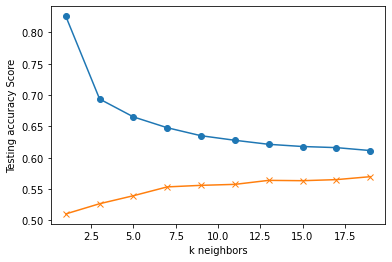

In [36]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [37]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.553


In [71]:
X_test_scaled[0]

array([ 0.        ,  0.08081927, -0.81608858])

In [35]:
input_scaled=X_scaler.transform([[32]])
knn.predict(input_scaled)

array([0.])

In [25]:
# new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict([[28,.56,.02]])
print(predicted_class)

[0.]


Source: [Sklearn Nearest Neighbors](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html)

In [38]:
import pickle
model_name='final_modle.sav'
scaler_name='input_scaler.sav'
pickle.dump(knn, open(model_name, 'wb'))
pickle.dump(X_scaler, open(scaler_name, 'wb'))